In [1]:
import numpy as np
import matplotlib as mpl
from scipy import signal, integrate
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def formatFancyplot(chart, title, xLabel, yLabel):
    chart.title(title)
    chart.xlabel(xLabel)
    chart.ylabel(yLabel)

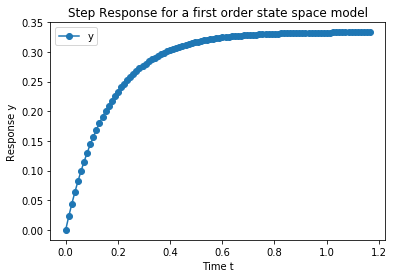

In [3]:
A = np.float(-6.0)
B = np.float(2.0)
C = np.float(1.0)
D = np.float(0.0)
sys1 = signal.StateSpace(A, B, C, D)
t1, y1 = signal.step(sys1)

chart = plt
formatFancyplot(chart, 
                'Step Response for a first order state space model', 
                'Time t', 
                'Response y')
chart.plot(t1, y1, '-o', label='y')
chart.legend()

In [4]:
# Nonlinear dynamic system simulation
tspan = np.array([0.0, 20.0])
y0 = np.array([2, 0])

Van der Pol equation is a second-order nonlinear ODE:
\begin{equation*}
    y_1''-\mu (1-y_1^2)y_1'+y_1 = 0
\end{equation*}
where $\mu>0$ is a scalar parameter. Rewrite this equation as a system of first-order ODEs by making the substitution $y_1'=y_2$:
\begin{equation*}
    \begin{aligned}
        y_1'&=y_2 \\
        y_2'&= \mu (1-y_1^2)y_2-y_1
    \end{aligned}
\end{equation*}

In [5]:
# Define the Van der Pol equation update as a function (mu = 1)
def vdp_update(t, y):
    return [y[1], (1-y[0]**2)*y[1]-y[0]]

In [6]:
# Variable step size solver (defaul RK45)
sol = integrate.solve_ivp(vdp_update, tspan, y0)

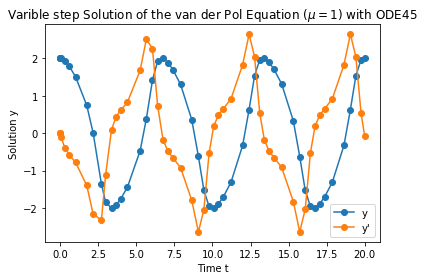

In [7]:
chart = plt
formatFancyplot(chart, 
                'Varible step Solution of the van der Pol Equation ($\mu = 1$) with ODE45', 
                'Time t', 
                'Solution y')
chart.plot(sol.t, sol.y[0, :], '-o', label='y')
chart.plot(sol.t, sol.y[1, :], '-o', label='y\'')
chart.legend()

In [8]:
# Define the Van der Pol equation update as a function (mu = 1) 
# solve_ivp accepts func(t, y), and odeint accepts func(y, t)
def vdp_update_fixed(y, t):
    return [y[1], (1-y[0]**2)*y[1]-y[0]]

# Fixed step size solver
t = np.linspace(0, 20, 201)
y = integrate.odeint(vdp_update_fixed, y0, t) # returns ndarray object

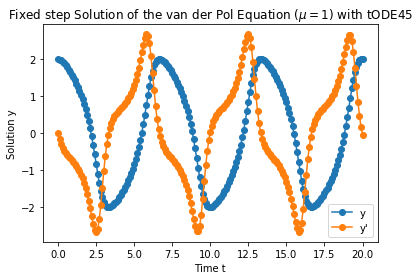

In [9]:
chart = plt
formatFancyplot(chart, 
                'Fixed step Solution of the van der Pol Equation ($\mu = 1$) with tODE45', 
                'Time t', 
                'Solution y')
chart.plot(t, y[:, 0], '-o', label='y')
chart.plot(t, y[:, 1], '-o', label='y\'')
chart.legend()